Precisión con datos sin normalizar: 0.4600
Precisión con datos normalizados (Z-Score): 0.5300


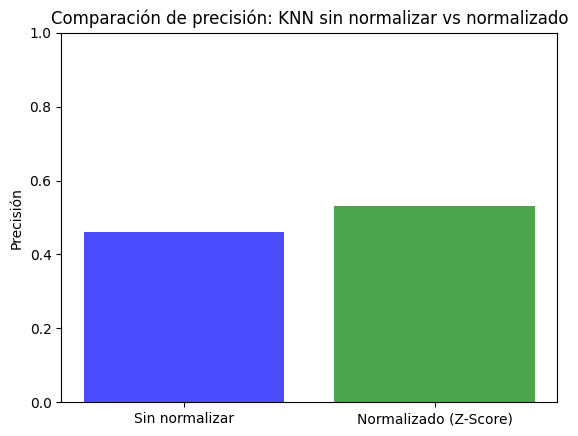

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Paso 1: Generar un dataset artificial con características en órdenes de magnitud muy diferentes
np.random.seed(99)
# Una característica entre 1 y 10, y otra característica entre 1 y 1 millón
X_large_scale = np.random.rand(500, 2) * [1, 1000000]  # Escalas extremadamente diferentes
y = np.random.randint(0, 2, size=500)  # Dos clases (0 y 1)

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_large_scale, y, test_size=0.2, random_state=42)

# Paso 2: Entrenar y evaluar KNN con datos sin normalizar
knn_no_normalized = KNeighborsClassifier(n_neighbors=5)
knn_no_normalized.fit(X_train, y_train)
y_pred_no_normalized = knn_no_normalized.predict(X_test)

# Calcular precisión con datos sin normalizar
accuracy_no_normalized = accuracy_score(y_test, y_pred_no_normalized)
print(f'Precisión con datos sin normalizar: {accuracy_no_normalized:.4f}')

# Paso 3: Normalización usando Z-Score
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Paso 4: Entrenar y evaluar KNN con datos normalizados
knn_normalized = KNeighborsClassifier(n_neighbors=5)
knn_normalized.fit(X_train_normalized, y_train)
y_pred_normalized = knn_normalized.predict(X_test_normalized)

# Calcular precisión con datos normalizados
accuracy_normalized = accuracy_score(y_test, y_pred_normalized)
print(f'Precisión con datos normalizados (Z-Score): {accuracy_normalized:.4f}')

# Paso 5: Graficar las diferencias de precisión
labels = ['Sin normalizar', 'Normalizado (Z-Score)']
accuracy_values = [accuracy_no_normalized, accuracy_normalized]

plt.bar(labels, accuracy_values, color=['blue', 'green'], alpha=0.7)
plt.title('Comparación de precisión: KNN sin normalizar vs normalizado')
plt.ylabel('Precisión')
plt.ylim(0.0, 1.0)  # Mostrar el rango completo para visualizar mejor la diferencia
plt.show()
